##Ordinary Least Squares
*  does not work when we have many features or when we have more features than we do datapoints.

*  mean squared error gives estimate of amount you can expect to be off (double it).

*  $r^2$-the coefficient of variation is a measure of how much better off we are with our estimator than if we had just used the mean as an estimator.  can be accessed through `clf.score(x,y)` in sklearn or through `r2_score` function in metrics package. 

*  To check your work, plot predicted y values against actual y values and then plot line of slope 1 and see how they match up.

*  Cross validation not usually used because amount of overfitting is usually slight.  Gives a more conservative estimate

##Penalized or Regularized Regression
* penalizing means we add a penalty for overconfidence in the parameter values.  adding a penalty means that we require more data to convince ourselves that there is a strong relationship between input variables and output prediction.

* adding bias- so worse fit but possibly better variance.

###L1 and L2 penalties
* L1 (Lasso) means we penalize the regression by the sum of the absolute values of the coefficients.  Often leands to coeffients being set to 0, which is good because performs feature selection and regression in one step.
* L2 (Ridge) means we penalize by the sum of squares.
* using both kinds is called an ElasticNet
* alpha coeffient govern amount of penalization.  When a is close to zero, closer to unpenalized.
* look for higher training error but lower test error

In [ ]:
las = Lasso(normalize=1)
alphas = np.logspace(-5,2 1000)
alphas, coefs, _ = las.path(x, y, alphas=alphas)

*  path method on Lasso object returns the coeffients that solve the lasso problem with that parameter value.  
*  To visualize, plot value of coefficients as alpha decreases.  Where everything plateaus on the right is close the unpenalized.

##P-greater-than-N scenarios
*  when p (number of dimensions) is greater than n (number of samples).  e.g. bag of words.

*  can get infinitely many solutions with 0 training error because more equations than data points.  In this case, you must use regularization.

##Setting hyper parameters in a principled way
* use two levels of cross-validation- one to estimate generaliztion and a second level to get good parameters.
* `RidgeCV`, `LassoCV`, `ElasticNetCV` as level two.  `test_train_split` as upper level.
* use `n_jobs` as -1 to use all available processors or 2 or three or whatever.
* only one value for alpha--overall regularization.  `l1_ratio` sets the tradeoff.  You can do this:
```
l1_ratio = [.01, .05, .25, .5, .75, .95, .99]
met = ElasticNetCV(
        l1_ratio=l1_ratio,
        n_jobs=-1)
```

In [10]:
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.datasets import load_boston
import numpy as np
boston = load_boston()
X = boston.data
Y = boston.target

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import KFold
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
kf = KFold(len(X), n_folds=5)

predicted = np.zeros_like(Y)
for train,test in kf:
    lr.fit(X[train], Y[train])
    predicted[test] = lr.predict(X[test])

rmse_cv = np.sqrt(mean_squared_error(Y, predicted))

print 'RMSE: %.3f'% rmse_cv
print 'r2 : %.3f'%r2_score(Y, predicted)


RMSE: 6.097
r2 : 0.560


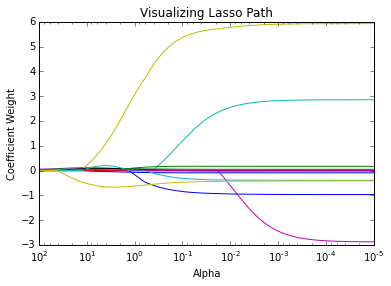

In [11]:
from sklearn.linear_model import Lasso
las = Lasso(normalize=1)
alphas = np.logspace(-5, 2, 1000)
alphas, coefs, _ = las.path(X, Y, alphas=alphas)

fig, ax = plt.subplots()
ax.plot(alphas, coefs.T)
ax.set_xscale('log')
#alphas decrease from left to right
ax.set_xlim(alphas.max(), alphas.min())
ax.set_xlabel('Alpha')
ax.set_ylabel('Coefficient Weight')
ax.set_title('Visualizing Lasso Path')
plt.show()

Note: the model above was not overfitting much.  I'm just doing the elasticnet for fun.  Normally you want to do it when you have high dimensional data that has really low r2 during cross validation but perfect fit on training data.

###First, without tuning alpha and alpha_ratio

In [27]:
from sklearn.linear_model import ElasticNet
from sklearn.cross_validation import KFold
from sklearn.metrics import mean_squared_error, r2_score

met = ElasticNet(alpha=0.1)
kf = KFold(len(X), n_folds=5)

predicted = np.zeros_like(Y)
for train,test in kf:
    met.fit(X[train], Y[train])
    predicted[test] = met.predict(X[test])

rmse_cv = np.sqrt(mean_squared_error(Y,predicted))

print 'RMSE: %.3f'% rmse_cv
print 'r2: %.3f'%r2_score(Y, predicted)


RMSE: 5.704
r2: 0.615


###Using ElasticNetCV

In [33]:
from sklearn.linear_model import ElasticNetCV
from sklearn.cross_validation import KFold
from sklearn.metrics import mean_squared_error, r2_score

l1_ratio = [0.0001, .01,.05,.25,.5,.75,.95,.99]
met = ElasticNetCV(
        l1_ratio = l1_ratio,
        n_jobs=1)
kf = KFold(len(X), n_folds=5)

predicted = np.zeros_like(Y)
for train,test in kf:
    met.fit(X[train], Y[train])
    predicted[test] = met.predict(X[test])

rmse_cv = np.sqrt(mean_squared_error(Y, predicted))

print 'alpha:', met.alpha_
print 'l1 ratio', met.l1_ratio_
print 'RMSE: %.3f'% rmse_cv
print 'r2: %.3f'%r2_score(Y, predicted)


alpha: 0.844891650663
l1 ratio 0.5
RMSE: 6.138
r2: 0.554


But Why would I get a lower value using this than I would just using regular regression.  Wouldn't the CV just set alpha to 0?